# setup

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('fList_model_A.pkl', 'rb') as f:
    fList_model_A = pickle.load(f)
with open('fList_model_B.pkl', 'rb') as f:
    fList_model_B = pickle.load(f)

## word2vec load

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api

# Load pre-trained Word2Vec model (Google News or other corpus)
model = api.load('word2vec-google-news-300')  # 300-dimensional Word2Vec


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [4]:
# Define a list of words
words = ["king", "queen", "man", "woman"]

# Get embeddings for each word
word_embeddings = [model[word] for word in words]
embeddings = np.array(word_embeddings)

## search modB, get modA pair

In [24]:
def find_indices_with_keyword(fList, keyword):
    """
    Find all indices of fList which contain the keyword in the string at those indices.

    Args:
    fList (list of str): List of strings to search within.
    keyword (str): Keyword to search for within the strings of fList.

    Returns:
    list of int: List of indices where the keyword is found within the strings of fList.
    """
    index_list = []
    keyword_list = []
    for index, string in enumerate(fList):
        split_list = string.split(',')
        no_space_list = [i.replace(' ', '').lower() for i in split_list]
        if keyword in no_space_list:
            index_list.append(index)
            keyword_list.extend(no_space_list)
    return index_list, keyword_list

In [9]:
def get_values_from_indices(indices, values_list):
    """
    Get the values from values_list at the specified indices.

    Args:
    indices (list of int): List of indices to retrieve values from.
    values_list (list): List of values from which to retrieve the specified indices.

    Returns:
    list: List of values from values_list at the specified indices.
    """
    return [values_list[index] for index in indices]

# get numeric features

In [64]:
# mixed_modA_feats = []
mixed_modB_feats = []
mixed_modB_labels = []

keywords = [
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
    "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty",
    "hundred", "thousand", "million", "billion", "trillion",
    "integer", "fraction", "decimal", "percentage", "ratio",
    "numeral", "digit", "prime", "even", "odd",
    "sum", "difference", "product", "factor", "multiple",
    "total", "count", "measure", "dozen", "score", "unit"
]

for kw in keywords:
    modB_feats, labels_list_B = find_indices_with_keyword(fList_model_B, kw)
    # modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_AB)
    # mixed_modA_feats.extend(modA_feats)
    mixed_modB_feats.extend(modB_feats)
    mixed_modB_labels.extend(labels_list_B)


# print( len(list(set(mixed_modA_feats))) )
len(list(set(mixed_modB_feats)))

417

In [26]:
len(mixed_modB_labels)

2938

In [28]:
mixed_modB_labels[0:10]

['get', 'one', 'one', 'khan', 'federation', '', 'sel', 'sel', 'one', 'one']

## word2vec of feature list

In [34]:
word_embeddings = []
for word in mixed_modB_labels:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

In [35]:
# 1. Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

# 3. Compute the average pairwise cosine similarity
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.18325965


## word2vec of keywords

In [47]:
word_embeddings = []
for word in keywords:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

In [48]:
# 1. Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

# 3. Compute the average pairwise cosine similarity
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.26136804


In [63]:
keywords = [ "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten"]
word_embeddings = []
for word in keywords:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

similarity_matrix = cosine_similarity(embeddings)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.78958076


# get ppl features

In [65]:
# mixed_modA_feats = []
mixed_modB_feats = []
mixed_modB_labels = []

keywords = [
    "man", "girl", "boy", "kid", "dad", "mom", "son", "sis", "bro",
    "pal", "mate", "boss", "chief", "cop", "guide", "priest", "king",
    "queen", "duke", "lord", "friend", "judge", "clerk", "coach", "team",
    "crew", "staff", "nurse", "doc", "vet", "cook", "maid", "clown",
    "star", "clan", "host", "guest", "peer", "guard", "boss", "spy",
    "fool", "punk", "nerd", "jock", "chief", "folk", "crowd"
]

for kw in keywords:
    modB_feats, labels_list_B = find_indices_with_keyword(fList_model_B, kw)
    # modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_AB)
    # mixed_modA_feats.extend(modA_feats)
    mixed_modB_feats.extend(modB_feats)
    mixed_modB_labels.extend(labels_list_B)


# print( len(list(set(mixed_modA_feats))) )
len(list(set(mixed_modB_feats)))

400

In [56]:
len(mixed_modB_labels)

2517

In [57]:
mixed_modB_labels[0:10]

['man', 'man', 'man', 'man', 'man', '', 'squad', 'ist', 'general', 'squad']

## word2vec of feature list

In [66]:
word_embeddings = []
for word in mixed_modB_labels:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

In [67]:
# 1. Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

# 3. Compute the average pairwise cosine similarity
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.10164641


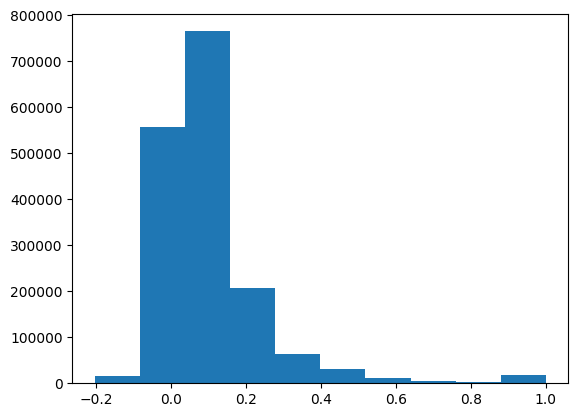

In [68]:
plt.hist(pairwise_sims)
plt.show()

## word2vec of keywords

In [60]:
word_embeddings = []
for word in keywords:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

In [61]:
# 1. Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

# 3. Compute the average pairwise cosine similarity
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.1731268


# get rand features

In [40]:
rand_feats = np.random.choice(len(fList_model_B), size=len(mixed_modB_labels), replace=False).tolist()
len(rand_feats)

2938

In [41]:
len(list(set(rand_feats)))

2938

In [43]:
rand_keyword_list = []
for index in rand_feats:
    string = fList_model_B[index]
    split_list = string.split(',')
    no_space_list = [i.replace(' ', '').lower() for i in split_list]
    rand_keyword_list.extend(no_space_list)
len(rand_keyword_list)

17659

In [44]:
rand_keyword_list[0:10]

['map', 'map', 'map', '.', 'map', '', 'surgery', 'surgery', 'surgery', 'exec']

## word2vec

In [45]:
word_embeddings = []
for word in rand_keyword_list:
    if word in model:
        word_embeddings.append(model[word])
embeddings = np.array(word_embeddings)

In [46]:
# 1. Compute pairwise cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
n = similarity_matrix.shape[0]
pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

# 3. Compute the average pairwise cosine similarity
average_similarity = np.mean(pairwise_sims)
print("Average Pairwise Cosine Similarity:", average_similarity)

Average Pairwise Cosine Similarity: 0.08111281


## loop

In [53]:
mean_cos_sim = []

for _ in range(100):
    rand_feats = np.random.choice(len(fList_model_B), size=len(mixed_modB_labels), replace=False).tolist()
    rand_keyword_list = []
    for index in rand_feats:
        string = fList_model_B[index]
        split_list = string.split(',')
        no_space_list = [i.replace(' ', '').lower() for i in split_list]
        rand_keyword_list.extend(no_space_list)

    word_embeddings = []
    for word in rand_keyword_list:
        if word in model:
            word_embeddings.append(model[word])
    embeddings = np.array(word_embeddings)

    # 1. Compute pairwise cosine similarity
    similarity_matrix = cosine_similarity(embeddings)

    # 2. Extract upper triangle of the similarity matrix (excluding the diagonal)
    n = similarity_matrix.shape[0]
    pairwise_sims = similarity_matrix[np.triu_indices(n, k=1)]

    # 3. Compute the average pairwise cosine similarity
    average_similarity = np.mean(pairwise_sims)
    mean_cos_sim.append(average_similarity)

print("Average Pairwise Cosine Similarity:", sum(mean_cos_sim) / len(mean_cos_sim))

Average Pairwise Cosine Similarity: 0.08261416979134083


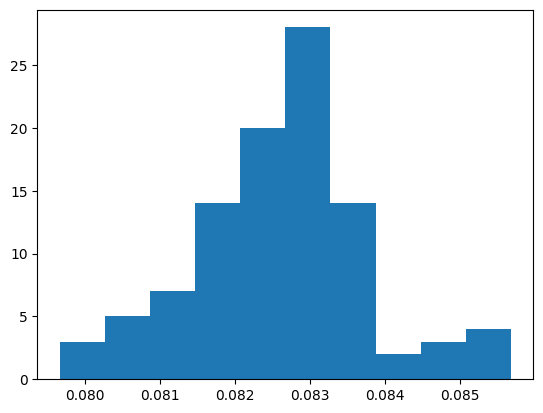

In [54]:
plt.hist(mean_cos_sim)
plt.show()

# bert

In [3]:
from transformers import BertTokenizer, BertModel
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## test

In [ ]:
# Example: Get embeddings for the words in context
inputs = tokenizer(["The man", "The girl", "The king", "The boss"], return_tensors='pt', padding=True)
outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1)

In [70]:
cosine_sim = cosine_similarity(embeddings.detach().numpy())

In [71]:
cosine_sim

array([[0.9999999 , 0.9280677 , 0.8114394 , 0.80058676],
       [0.9280677 , 0.9999999 , 0.8002921 , 0.7989497 ],
       [0.8114394 , 0.8002921 , 0.9999998 , 0.82488936],
       [0.80058676, 0.7989497 , 0.82488936, 1.        ]], dtype=float32)

In [73]:
n = cosine_sim.shape[0]
# Extract upper triangle of the similarity matrix (excluding diagonal)
pairwise_sims = cosine_sim[np.triu_indices(n, k=1)]
average_similarity = np.mean(pairwise_sims)

print("Average Cosine Similarity for the group of words:", average_similarity)

Average Cosine Similarity for the group of words: 0.8273708


In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenize input sentence and get embeddings
words = ["king", "queen", "man", "woman"]
input_ids = tokenizer(words, return_tensors='pt', padding=True, truncation=True)['input_ids']

# Get hidden states (word embeddings) from the last hidden layer
with torch.no_grad():
    outputs = model(input_ids)
    embeddings = outputs.last_hidden_state

# Convert embeddings to numpy array
embeddings = embeddings.mean(dim=1).numpy()  # Take mean across tokens if it's a sentence


## numeric

In [74]:
keywords = [
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten",
    "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty",
    "hundred", "thousand", "million", "billion", "trillion",
    "integer", "fraction", "decimal", "percentage", "ratio",
    "numeral", "digit", "prime", "even", "odd",
    "sum", "difference", "product", "factor", "multiple",
    "total", "count", "measure", "dozen", "score", "unit"
]

In [75]:
# Example: Get embeddings for the words in context
inputs = tokenizer(keywords, return_tensors='pt', padding=True)
outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1)

In [76]:
cosine_sim = cosine_similarity(embeddings.detach().numpy())

In [77]:
n = cosine_sim.shape[0]
# Extract upper triangle of the similarity matrix (excluding diagonal)
pairwise_sims = cosine_sim[np.triu_indices(n, k=1)]
average_similarity = np.mean(pairwise_sims)

print("Average Cosine Similarity for the group of words:", average_similarity)

Average Cosine Similarity for the group of words: 0.74362355


## rand

In [31]:
# rand_feats = np.random.choice(len(fList_model_B), size=len(mixed_modB_labels), replace=False).tolist()
rand_feats = np.random.choice(len(fList_model_B), size=2900, replace=False).tolist()
rand_keyword_list = []
for index in rand_feats:
    string = fList_model_B[index]
    # split_list = string.split(',')
    split_list = string.split(',')[0]  # reduce list len to prevent OOM
    no_space_list = [i.replace(' ', '').lower() for i in split_list]
    # rand_keyword_list.extend(no_space_list)
    rand_keyword_list.append(split_list) # reduce list len to prevent OOM

In [39]:
rand_keyword_list[:10]

[' Dennis',
 '.',
 "'m",
 '\\n',
 ' Hindu',
 ' Kill',
 '\\n',
 '.',
 ' against',
 ' efficiency']

In [33]:
# Example: Get embeddings for the words in context
inputs = tokenizer(rand_keyword_list, return_tensors='pt', padding=True).to(device)
outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim=1)

In [38]:
cosine_sim = cosine_similarity(embeddings.detach().cpu().numpy())

n = cosine_sim.shape[0]
# Extract upper triangle of the similarity matrix (excluding diagonal)
pairwise_sims = cosine_sim[np.triu_indices(n, k=1)]
average_similarity = np.mean(pairwise_sims)

print("Average Cosine Similarity for the group of words:", average_similarity)

Average Cosine Similarity for the group of words: 0.6717642
